In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import *
import plotly.express as px

In [2]:
hr_dataset = pd.read_csv("HR_comma_sep (1).csv")
hr_dataset

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales  salary  
0                          0    sales     low  
1                          0    sales  medium  
2                          0    sales  medium  
3                          0    sales     low  
4                          0    sales     low  
...                      ...      ...     ...  
14994                      0  support     low  
14995                      0  support     low  
14996                      0  support     low  
14997                      0  support     low  
14998                      0  support     low  

[14999 rows x 10 columns]

In [3]:
hr_dataset.shape

(14999, 10)

### Preprocessing

In [4]:
# Lets first check if any rows/columns have any missing values

def display_missing(df):    
    for col in df.columns.tolist():   
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))   
    print('\n')
    
display_missing(hr_dataset)

satisfaction_level column missing values: 0
last_evaluation column missing values: 0
number_project column missing values: 0
average_montly_hours column missing values: 0
time_spend_company column missing values: 0
Work_accident column missing values: 0
left column missing values: 0
promotion_last_5years column missing values: 0
sales column missing values: 0
salary column missing values: 0




In [5]:
# we realise the sales column is named incorrectly, perhaps a trick to test my attention! I will rename this to "department"
# and monthly has been spelled wrong

hr_dataset.rename(columns = {'sales':'department','average_montly_hours':'average_monthly_hours'}, inplace = True) 
hr_dataset

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
0                        157                   3              0     1   
1                        262                   6              0     1   
2                        272                   4              0     1   
3                        223                   5              0     1   
4                        159                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       promotion_last_5years department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [6]:
# No missing values, so we can progress
# Lets have a quick look into some stats of the data

hr_dataset.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [7]:
hr_dataset.corr()

# the strongest reasons for leaving are correlated with satisfaction, time_spend_company and work accidents

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_monthly_hours           -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_monthly_hours  time_spend_company  \
satisfaction_level                 -0.020048           -0.100866   
last_evaluation                     0.339742            0.131591   
number_project                      0.417211            0.196786   
average_monthly_hours               1.000000            0.127755   
time_spend_company                  0.127755            1.000000   
Work_accident                      -0.010143            0.002120   
left                                0.071287            0.144822   
promotion_last_5years              -0.003544            0.067433   

                       Work_accident      left  promotion_last_5years  
satisfaction_level          0.058697 -0.388375               0.025605  
last_evaluation            -0.007104  0.006567              -0.008684  
number_project             -0.004741  0.023787              -0.006064  
average_monthly_hours      -0.010143  0.071287              -0.003544  
time_spend_company          0.002120  0.144822               0.067433  
Work_accident               1.000000 -0.154622               0.039245  
left                       -0.154622  1.000000              -0.061788  
promotion_last_5years       0.039245 -0.061788               1.000000

In [8]:
ppp = hr_dataset.corr()['left'].reset_index().rename(columns = {'index': 'variable', 'left':'left correlation'}) 
ppp = ppp.loc[hr_dataset.corr()['left'].reset_index().left.abs().argsort().values[::-1][:11]].iloc[1:,:]
ppp



variable  left correlation
0     satisfaction_level         -0.388375
5          Work_accident         -0.154622
4     time_spend_company          0.144822
3  average_monthly_hours          0.071287
7  promotion_last_5years         -0.061788
2         number_project          0.023787
1        last_evaluation          0.006567

In [9]:
# lets label encode salary column since its ordinal
# lets onehotencode department colunn since they are not related to each other

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

hr_dataset_encoded = hr_dataset.copy()
hr_dataset_encoded["salary"] = le.fit_transform(hr_dataset_encoded["salary"])
hr_dataset_encoded = pd.concat([hr_dataset_encoded, pd.get_dummies(hr_dataset_encoded['department'], prefix = "department")], axis = 1).drop(['department'],axis = 1)
hr_dataset_encoded

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
0                        157                   3              0     1   
1                        262                   6              0     1   
2                        272                   4              0     1   
3                        223                   5              0     1   
4                        159                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       promotion_last_5years  salary  department_IT  department_RandD  \
0                          0       1              0                 0   
1                          0       2              0                 0   
2                          0       2              0                 0   
3                          0       1              0                 0   
4                          0       1              0                 0   
...                      ...     ...            ...               ...   
14994                      0       1              0                 0   
14995                      0       1              0                 0   
14996                      0       1              0                 0   
14997                      0       1              0                 0   
14998                      0       1              0                 0   

       department_accounting  department_hr  department_management  \
0                          0              0                      0   
1                          0              0                      0   
2                          0              0                      0   
3                          0              0                      0   
4                          0              0                      0   
...                      ...            ...                    ...   
14994                      0              0                      0   
14995                      0              0                      0   
14996                      0              0                      0   
14997                      0              0                      0   
14998                      0              0                      0   

       department_marketing  department_product_mng  department_sales  \
0                         0                       0                 1   
1                         0                       0                 1   
2                         0                       0                 1   
3                         0                       0                 1   
4                         0                       0                 1   
...                     ...                     ...               ...   
14994                     0                       0                 0   
14995                     0                       0                 0   
14996     

In [85]:
hr_dataset_encoded.describe().iloc[1:2,].melt().rename(columns = ({'value':'mean'}))

variable        mean
0       satisfaction_level    0.612834
1          last_evaluation    0.716102
2           number_project    3.803054
3    average_monthly_hours  201.050337
4       time_spend_company    3.498233
5            Work_accident    0.144610
6                     left    0.238083
7    promotion_last_5years    0.021268
8                   salary    1.347290
9            department_IT    0.081805
10        department_RandD    0.052470
11   department_accounting    0.051137
12           department_hr    0.049270
13   department_management    0.042003
14    department_marketing    0.057204
15  department_product_mng    0.060137
16        department_sales    0.276018
17      department_support    0.148610
18    department_technical    0.181345

In [11]:
hr_dataset_encoded.corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level                1.000000         0.105021       -0.142970   
last_evaluation                   0.105021         1.000000        0.349333   
number_project                   -0.142970         0.349333        1.000000   
average_monthly_hours            -0.020048         0.339742        0.417211   
time_spend_company               -0.100866         0.131591        0.196786   
Work_accident                     0.058697        -0.007104       -0.004741   
left                             -0.388375         0.006567        0.023787   
promotion_last_5years             0.025605        -0.008684       -0.006064   
salary                            0.011754         0.013965        0.009672   
department_IT                     0.006373         0.001269        0.003287   
department_RandD                  0.006615        -0.005471        0.009703   
department_accounting            -0.028649         0.002193        0.004189   
department_hr                    -0.012841        -0.009645       -0.027356   
department_management             0.007172         0.009662        0.009728   
department_marketing              0.005715        -0.000311       -0.023064   
department_product_mng            0.006919        -0.001989        0.000829   
department_sales                  0.004007        -0.023031       -0.013388   
department_support                0.009185         0.017104        0.000303   
department_technical             -0.009345         0.013742        0.028596   

                        average_monthly_hours  time_spend_company  \
satisfaction_level                  -0.020048           -0.100866   
last_evaluation                      0.339742            0.131591   
number_project                       0.417211            0.196786   
average_monthly_hours                1.000000            0.127755   
time_spend_company                   0.127755            1.000000   
Work_accident                       -0.010143            0.002120   
left                                 0.071287            0.144822   
promotion_last_5years               -0.003544            0.067433   
salary                               0.007082           -0.003086   
department_IT                        0.006967           -0.006053   
department_RandD                    -0.001177           -0.021116   
department_accounting                0.000524            0.003909   
department_hr                       -0.010783           -0.022194   
department_management                0.000834            0.115436   
department_marketing                -0.008210            0.012096   
department_product_mng              -0.005494           -0.003919   
department_sales                    -0.001718            0.015150   
department_support                  -0.002444           -0.030111   
department_technical                 0.013638           -0.027991   

                        Work_accident      left  promotion_last_5years  \
satisfaction_level           0.058697 -0.388375               0.025605   
last_evaluation             -0.007104  0.006567              -0.008684   
number_project              -0.004741  0.023787              -0.006064   
average_monthly_hours       -0.010143  0.071287              -0.003544   
time_spend_company           0.002120  0.144822               0.067433   
Work_accident                1.000000 -0.154622               0.039245   
left                        -0.154622  1.000000              -0.061788   
promotion_last_5years        0.039245 -0.061788               1.000000   
salary                      -0.002506 -0.001294              -0.001318   
department_IT               -0.009293 -0.010925              -0.038942   
department_RandD             0.017167 -0.046596               0.021268   
department_accounting       -0.012836  0.015201              -0.004852   
department_hr               -0.015649  0.028249              -0.001531   
department_management     

### Analysis

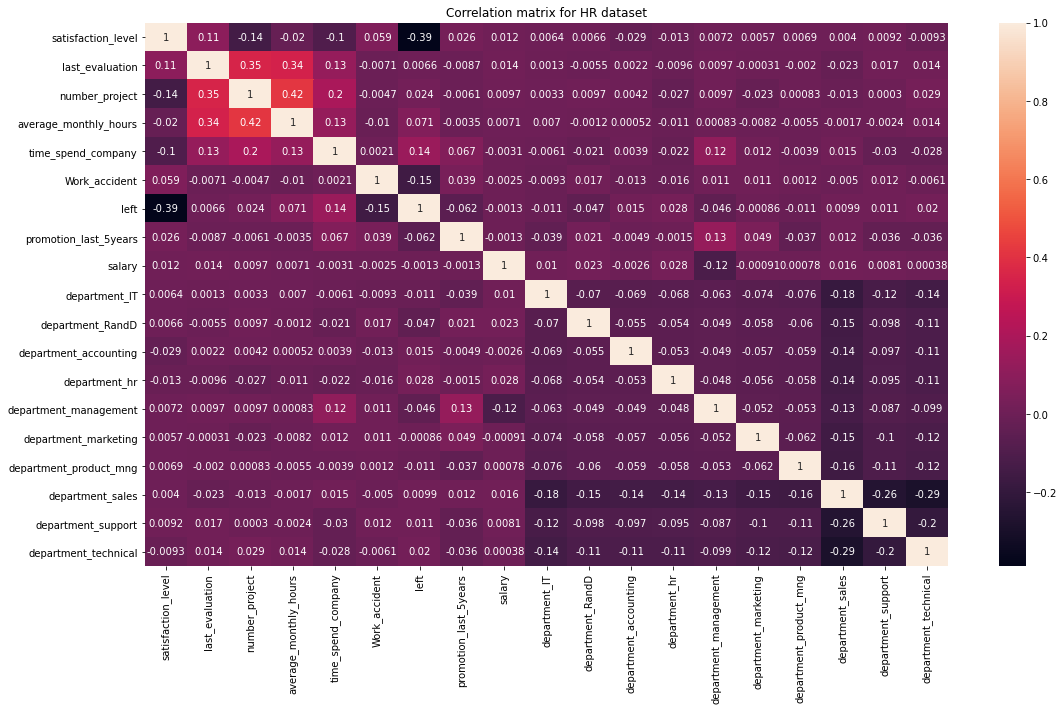

In [12]:
# we can now create a correlation matrix
fig, axes = plt.subplots(1, 1, figsize=(18, 10))

sns.heatmap(hr_dataset_encoded.corr(), annot=True).set_title('Correlation matrix for HR dataset')
plt.show()

In [13]:
# the variables ranked by absolute value

hr_dataset_encoded.corr()['left'].reset_index().rename(columns = {'index': 'variable', 'left':'left correlation'})\
.loc[hr_dataset_encoded.corr()['left'].reset_index().left.abs().argsort().values[::-1][:11]].iloc[1:,:]


variable  left correlation
0      satisfaction_level         -0.388375
5           Work_accident         -0.154622
4      time_spend_company          0.144822
3   average_monthly_hours          0.071287
7   promotion_last_5years         -0.061788
10       department_RandD         -0.046596
13  department_management         -0.046035
12          department_hr          0.028249
2          number_project          0.023787
18   department_technical          0.020076

In [14]:
hr_dataset.groupby(['left'])['left'].count().reset_index(name = 'Employee count')

left  Employee count
0     0           11428
1     1            3571

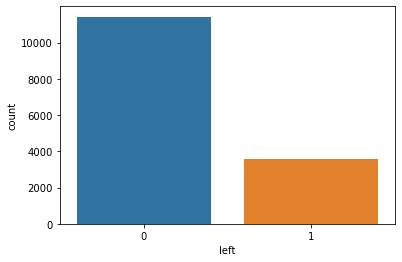

In [15]:
sns.countplot(x="left", data=hr_dataset)

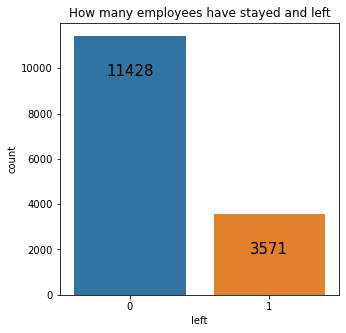

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
model_bar = sns.countplot(x="left", data = hr_dataset)
plt.title("How many employees have stayed and left") 

for p in model_bar.patches:
    model_bar.annotate(p.get_height(), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -35), 
                   textcoords = 'offset points')

In [17]:
time_spend_count = hr_dataset.groupby(['time_spend_company','left'])['left'].count().reset_index(name = 'Employee count')
time_spend_count


time_spend_company  left  Employee count
0                    2     0            3191
1                    2     1              53
2                    3     0            4857
3                    3     1            1586
4                    4     0            1667
5                    4     1             890
6                    5     0             640
7                    5     1             833
8                    6     0             509
9                    6     1             209
10                   7     0             188
11                   8     0             162
12                  10     0             214

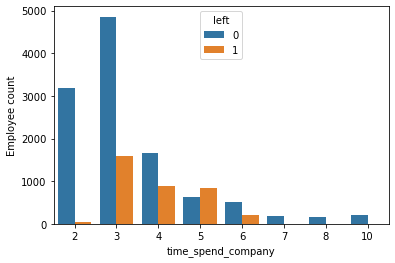

In [18]:
sns.barplot(x = 'time_spend_company', y = 'Employee count', data = time_spend_count, hue = 'left')

In [19]:
number_project = hr_dataset.groupby(['number_project','left'])['left'].count().reset_index(name = 'Employee count')
number_project

number_project  left  Employee count
0                2     0             821
1                2     1            1567
2                3     0            3983
3                3     1              72
4                4     0            3956
5                4     1             409
6                5     0            2149
7                5     1             612
8                6     0             519
9                6     1             655
10               7     1             256

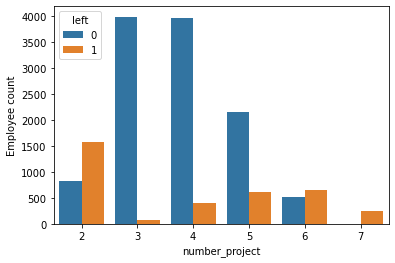

In [20]:
sns.barplot(x = 'number_project', y = 'Employee count', data = number_project, hue = 'left')

In [21]:
# we can see those on 2,6,7 project counts are more likely to leave than stay

In [22]:
salary_count = hr_dataset.groupby(['salary','left'])['left'].count().reset_index(name = 'Employee count')
salary_count

salary  left  Employee count
0    high     0            1155
1    high     1              82
2     low     0            5144
3     low     1            2172
4  medium     0            5129
5  medium     1            1317

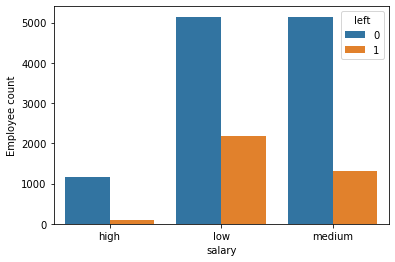

In [23]:
sns.barplot(x = 'salary', y = 'Employee count', data = salary_count, hue = 'left')

In [24]:
px.sunburst(salary_count, path = ['salary','left'], values='Employee count')

In [ ]:
# low has highest churn rate, and high has lowest churn rate

In [25]:
# Lets make a pie chart to representing department employee splits

import plotly.express as px

pie = px.pie(hr_dataset, values= hr_dataset['department'].value_counts() , names= hr_dataset['department'].value_counts().index, title='Employee pie chart by department',labels={'value':'employees'})
pie.update_traces(textposition='inside', textinfo='percent+label')
pie.show()

In [26]:
department_count = hr_dataset.groupby(['department','left'])['left'].count().reset_index(name = 'Employee count')
department_count

department  left  Employee count
0            IT     0             954
1            IT     1             273
2         RandD     0             666
3         RandD     1             121
4    accounting     0             563
5    accounting     1             204
6            hr     0             524
7            hr     1             215
8    management     0             539
9    management     1              91
10    marketing     0             655
11    marketing     1             203
12  product_mng     0             704
13  product_mng     1             198
14        sales     0            3126
15        sales     1            1014
16      support     0            1674
17      support     1             555
18    technical     0            2023
19    technical     1             697

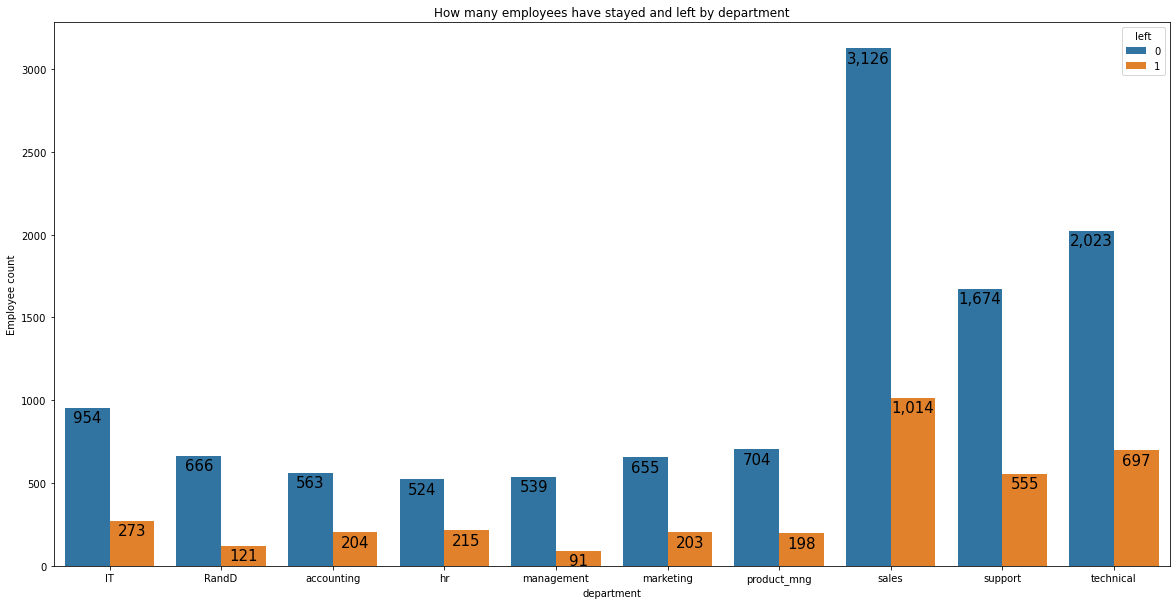

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
model_bar = sns.barplot(x = 'department', y = 'Employee count', data = department_count, hue = 'left')
plt.title("How many employees have stayed and left by department") 

for p in model_bar.patches:
    model_bar.annotate('{:,.0f}'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -10), 
                   textcoords = 'offset points')


In [ ]:
# indeed we conclude accounting, hr and technical have the highest leaving rates.
# we can see most people who left came from sales follwed by technical, however this is to be expected as these are the largest departmets
# the worst employee left rate is at hr

In [29]:
# lets find the highest leaving rates within departments

percentage_split_departments = hr_dataset.groupby(['department','left'])['left'].count().groupby(level=0).apply(lambda x: 100*x/x.sum())\
.reset_index(name='Leaving percentage').round(2)
percentage_split_departments[percentage_split_departments['left']==1].sort_values(by =['Leaving percentage'],ascending = False)

# hr has the highest leaving rate

department  left  Leaving percentage
7            hr     1               29.09
5    accounting     1               26.60
19    technical     1               25.62
17      support     1               24.90
15        sales     1               24.49
11    marketing     1               23.66
1            IT     1               22.25
13  product_mng     1               21.95
3         RandD     1               15.37
9    management     1               14.44

In [30]:
box = px.box(hr_dataset, x="left", y="satisfaction_level", color = "left", color_discrete_sequence=px.colors.qualitative.Set1)
box.show()

# clearly those who left we're more unsatsified at work, median 0.41 compared to 0.69

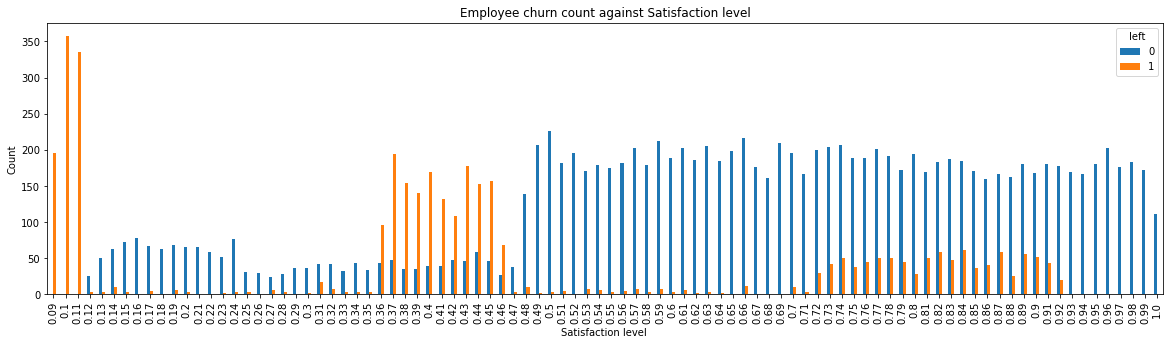

In [75]:
pd.crosstab(hr_dataset['satisfaction_level'],hr_dataset['left']).plot(kind="bar",figsize=(20,5))
plt.title('Employee churn count against Satisfaction level')
plt.xlabel('Satisfaction level ')
plt.ylabel('Count')
plt.show()

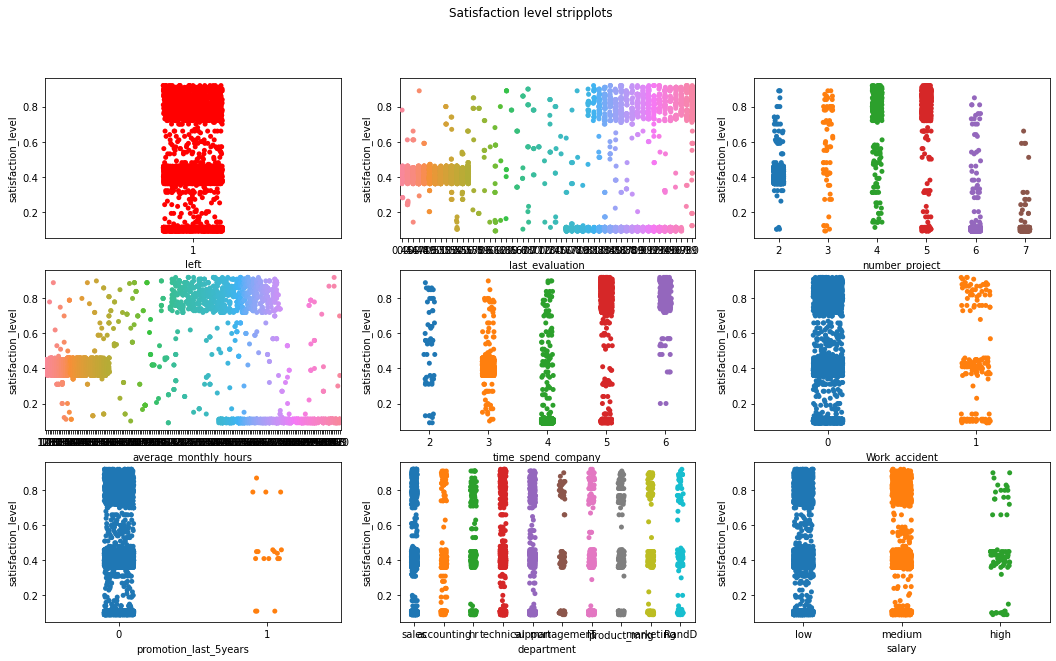

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

fig.suptitle('Satisfaction level stripplots')

sns.stripplot(ax=axes[0, 0], data=hr_dataset[hr_dataset['left']==1], x='left', y='satisfaction_level', color = 'r')
sns.stripplot(ax=axes[0, 1], data=hr_dataset[hr_dataset['left']==1], x='last_evaluation', y='satisfaction_level')
sns.stripplot(ax=axes[0, 2], data=hr_dataset[hr_dataset['left']==1], x='number_project', y='satisfaction_level')
sns.stripplot(ax=axes[1, 0], data=hr_dataset[hr_dataset['left']==1], x='average_monthly_hours', y='satisfaction_level')
sns.stripplot(ax=axes[1, 1], data=hr_dataset[hr_dataset['left']==1], x='time_spend_company', y='satisfaction_level')
sns.stripplot(ax=axes[1, 2], data=hr_dataset[hr_dataset['left']==1], x='Work_accident', y='satisfaction_level')
sns.stripplot(ax=axes[2, 0], data=hr_dataset[hr_dataset['left']==1], x='promotion_last_5years', y='satisfaction_level')
sns.stripplot(ax=axes[2, 1], data=hr_dataset[hr_dataset['left']==1], x='department', y='satisfaction_level')
sns.stripplot(ax=axes[2, 2], data=hr_dataset[hr_dataset['left']==1], x='salary', y='satisfaction_level')

In [ ]:
# from this we are able to see there are  3 groups the client must focus on to avoid losing them

# first cluster left due to extremely unsatisfied, seemingly from being overworked at with 5+ projects and higher average hours than the others
# these guys tend to be around 4/5 years with the company and have not been promoted despite their hard work
# they have a high evaluation score, indeeed the company is overworking great employees

# 2nd cluster aren't so happy, with a lot of them having lower average monthly hours than others
# they have low evaluation scores, many are on their second project and have been with the copmany 3/4 years
# perhpas they feel the lack of growth and the lack of hours isnt paying them enough


# 3rd cluster are very satisfied, so it's interesting to learn why they have left
# they had very high evaluation scores, were around 4/5 projects in
# they have a fairer amount of average monthly values, as compared the cluster 1 who were simialr but unsatsified
# but they were underpayed, with many of them low or medium salary suggesting they left to a company who payed more

In [32]:
# lets look further at these 3 groups
# the first cluster is below 0.15 in satisfaction level

cluster = hr_dataset[(hr_dataset['satisfaction_level']<0.15)]
cluster

satisfaction_level  last_evaluation  number_project  \
2                    0.11             0.88               7   
6                    0.10             0.77               6   
11                   0.11             0.81               6   
20                   0.11             0.83               6   
22                   0.09             0.95               6   
...                   ...              ...             ...   
14972                0.11             0.97               6   
14975                0.10             0.79               7   
14979                0.09             0.93               6   
14991                0.09             0.81               6   
14997                0.11             0.96               6   

       average_monthly_hours  time_spend_company  Work_accident  left  \
2                        272                   4              0     1   
6                        247                   4              0     1   
11                       305                   4              0     1   
20                       282                   4              0     1   
22                       304                   4              0     1   
...                      ...                 ...            ...   ...   
14972                    310                   4              0     1   
14975                    310                   4              0     1   
14979                    296                   4              0     1   
14991                    257                   4              0     1   
14997                    280                   4              0     1   

       promotion_last_5years  department  salary  
2                          0       sales  medium  
6                          0       sales     low  
11                         0       sales     low  
20                         0       sales     low  
22                         0       sales     low  
...                      ...         ...     ...  
14972                      0  accounting  medium  
14975                      0          hr  medium  
14979                      0   technical  medium  
14991                      0     support     low  
14997                      0     support     low  

[1045 rows x 10 columns]

In [33]:
# the average number of projects here is 5.9, more than the 3.8 company average
# the average monthly hours here is 266.00, more than the 200.1 monthly average of other employees

cluster.describe().iloc[:,[2,3]]

number_project  average_monthly_hours
count     1045.000000            1045.000000
mean         5.935885             265.996172
std          0.937053              37.860881
min          2.000000             100.000000
25%          6.000000             254.000000
50%          6.000000             273.000000
75%          6.000000             291.000000
max          7.000000             310.000000

In [34]:
hr_dataset_encoded[(hr_dataset_encoded['satisfaction_level']<0.15)].corr()['left'].reset_index()\
.rename(columns = {'index': 'variable', 'left':'left correlation'})\
.loc[hr_dataset_encoded[(hr_dataset_encoded['satisfaction_level']<0.15)]\
.corr()['left'].reset_index().left.abs().argsort().values[::-1][:11]].iloc[1:,:]

# (I created a dataframe of the ranked correlations with left by absolute values)
# these include the departments and salaries now as well, though they do not seem to be that important anyway to reasons for leaving
# within this region of employees, we see the reason many left is due to a low satisfaction level resulting from higher than\
# average monthly hours and having a high number of projects, which is what we saw before


variable  left correlation
0      satisfaction_level         -0.770683
3   average_monthly_hours          0.629428
2          number_project          0.620977
1         last_evaluation          0.524160
4      time_spend_company         -0.323640
5           Work_accident         -0.158207
16       department_sales         -0.055669
8                  salary          0.042567
13  department_management         -0.036086
9           department_IT          0.030156

In [ ]:
# clearly working them less hours and projects would make them happier here

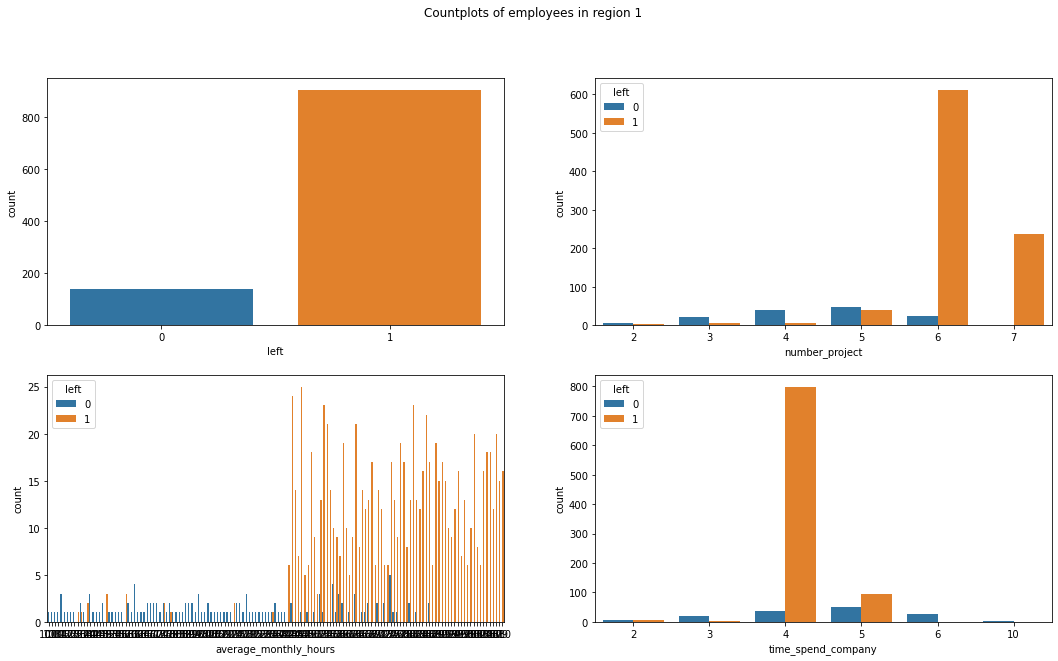

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Countplots of employees in region 1')

sns.countplot(ax=axes[0, 0],x="left", data=cluster)
sns.countplot(ax=axes[0, 1],x="number_project", data=cluster, hue = 'left')
sns.countplot(ax=axes[1, 0],x="average_monthly_hours", data=cluster, hue = 'left')
sns.countplot(ax=axes[1, 1],x="time_spend_company", data=cluster, hue = 'left')


In [36]:
# now we look at the second cluster group between 0.35 and 0.5 satisfaction levels

cluster2 = hr_dataset[(hr_dataset['satisfaction_level']<0.5)&(hr_dataset['satisfaction_level']>0.35)]
cluster2

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
...                   ...              ...             ...   
14992                0.40             0.48               2   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
0                        157                   3              0     1   
4                        159                   3              0     1   
5                        153                   3              0     1   
9                        142                   3              0     1   
10                       135                   3              0     1   
...                      ...                 ...            ...   ...   
14992                    155                   3              0     1   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14998                    158                   3              0     1   

       promotion_last_5years department salary  
0                          0      sales    low  
4                          0      sales    low  
5                          0      sales    low  
9                          0      sales    low  
10                         0      sales    low  
...                      ...        ...    ...  
14992                      0    support    low  
14994                      0    support    low  
14995                      0    support    low  
14996                      0    support    low  
14998                      0    support    low  

[2412 rows x 10 columns]

In [37]:
hr_dataset_encoded[(hr_dataset_encoded['satisfaction_level']<0.5)&(hr_dataset_encoded['satisfaction_level']>0.35)].corr()['left']\
.reset_index().rename(columns = {'index': 'variable', 'left':'left correlation'}) \
.loc[hr_dataset_encoded[(hr_dataset_encoded['satisfaction_level']<0.5)&(hr_dataset_encoded['satisfaction_level']>0.35)]\
.corr()['left'].reset_index().left.abs().argsort().values[::-1][:11]].iloc[1:,:]

variable  left correlation
2           number_project         -0.689441
1          last_evaluation         -0.491512
3    average_monthly_hours         -0.476644
0       satisfaction_level         -0.422229
4       time_spend_company         -0.246803
5            Work_accident         -0.204257
7    promotion_last_5years         -0.084856
10        department_RandD         -0.081256
13   department_management         -0.067454
15  department_product_mng         -0.057291

In [ ]:
# perhaps the lack of growth and low evaluation scores at around 3 year mark suggested these lower performing ex employees\
# sensed no progress at the company or potentially were even let go 

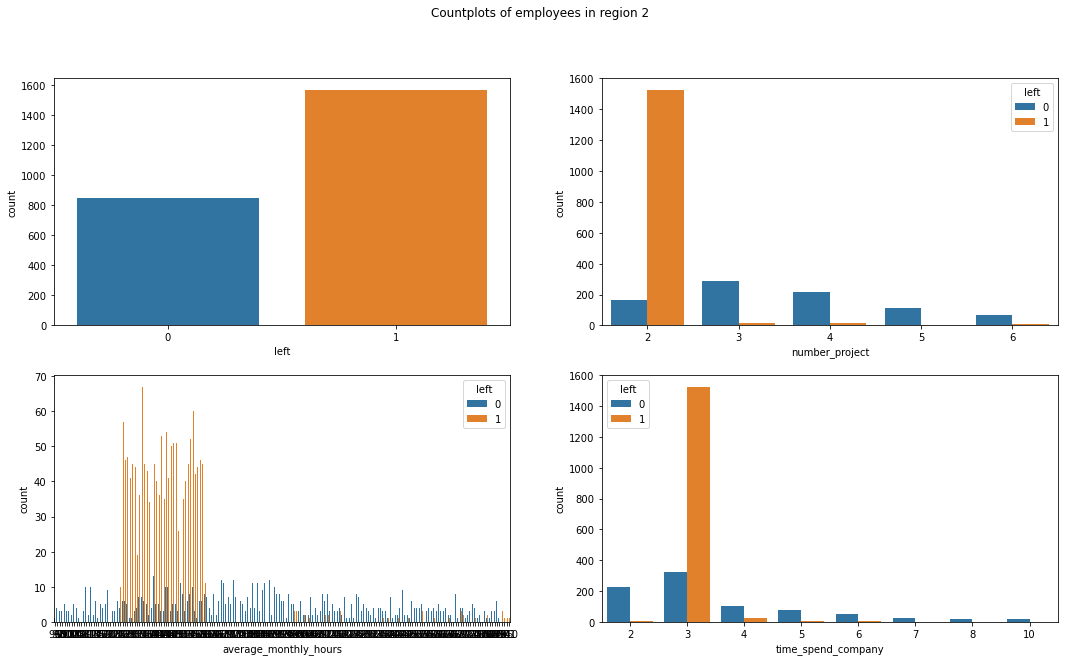

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Countplots of employees in region 2')

sns.countplot(ax=axes[0, 0],x="left", data=cluster2)
sns.countplot(ax=axes[0, 1],x="number_project", data=cluster2, hue = 'left')
sns.countplot(ax=axes[1, 0],x="average_monthly_hours", data=cluster2, hue = 'left')
sns.countplot(ax=axes[1, 1],x="time_spend_company", data=cluster2, hue = 'left')

In [39]:
cluster3 = hr_dataset[(hr_dataset['satisfaction_level']> 0.7)]
cluster3

satisfaction_level  last_evaluation  number_project  \
1                    0.80             0.86               5   
3                    0.72             0.87               5   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
12                   0.84             0.92               4   
...                   ...              ...             ...   
14985                0.91             0.99               5   
14986                0.85             0.85               4   
14987                0.90             0.70               5   
14990                0.89             0.88               5   
14993                0.76             0.83               6   

       average_monthly_hours  time_spend_company  Work_accident  left  \
1                        262                   6              0     1   
3                        223                   5              0     1   
7                        259                   5              0     1   
8                        224                   5              0     1   
12                       234                   5              0     1   
...                      ...                 ...            ...   ...   
14985                    254                   5              0     1   
14986                    247                   6              0     1   
14987                    206                   4              0     1   
14990                    228                   5              1     1   
14993                    293                   6              0     1   

       promotion_last_5years department  salary  
1                          0      sales  medium  
3                          0      sales     low  
7                          0      sales     low  
8                          0      sales     low  
12                         0      sales     low  
...                      ...        ...     ...  
14985                      0  technical  medium  
14986                      0  technical     low  
14987                      0  technical     low  
14990                      0    support     low  
14993                      0    support     low  

[6298 rows x 10 columns]

In [40]:
hr_dataset_encoded[(hr_dataset_encoded['satisfaction_level']> 0.7)].corr()['left']\
.reset_index().rename(columns = {'index': 'variable', 'left':'left correlation'})\
.loc[hr_dataset_encoded[(hr_dataset_encoded['satisfaction_level']> 0.7)].corr()['left']\
.reset_index().left.abs().argsort().values[::-1][:11]].iloc[1:,:]


variable  left correlation
4      time_spend_company          0.435619
1         last_evaluation          0.403203
3   average_monthly_hours          0.334504
2          number_project          0.303909
0      satisfaction_level         -0.134416
5           Work_accident         -0.121768
7   promotion_last_5years         -0.053413
13  department_management         -0.036722
10       department_RandD         -0.031125
17     department_support          0.020701

In [ ]:
# for this dataset we see time_spend_company is the main reason they moved on
# interestingly this group was very happy and high performing

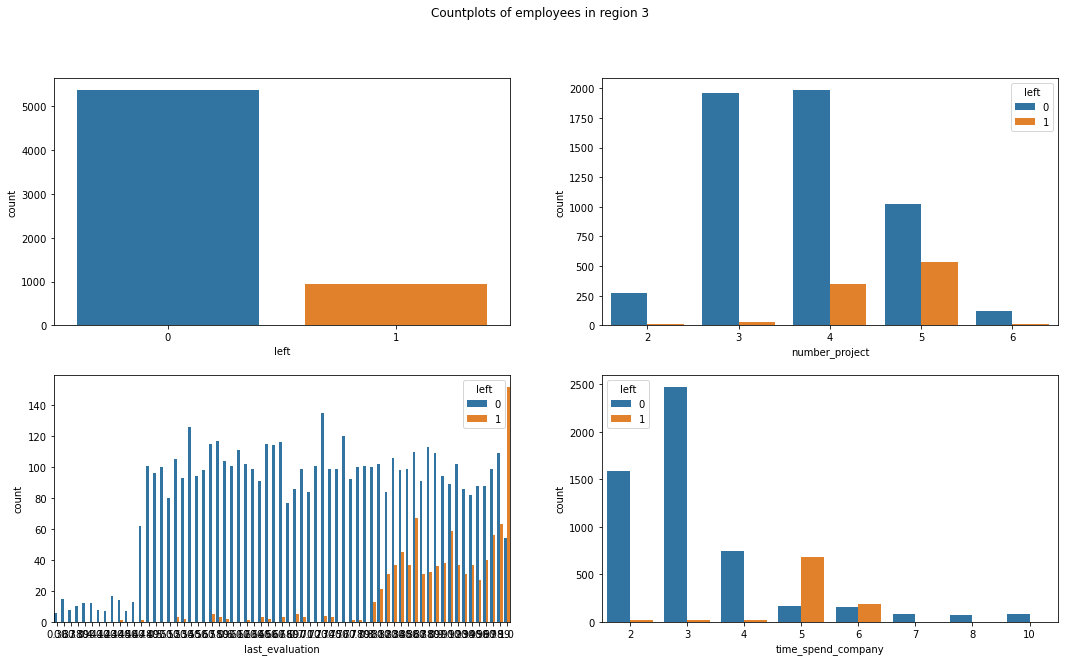

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Countplots of employees in region 3')

sns.countplot(ax=axes[0, 0],x="left", data=cluster3)
sns.countplot(ax=axes[0, 1],x="number_project", data=cluster3, hue = 'left')
sns.countplot(ax=axes[1, 0],x="last_evaluation", data=cluster3, hue = 'left')
sns.countplot(ax=axes[1, 1],x="time_spend_company", data=cluster3, hue = 'left')


In [42]:
# lets look at the spike in plot 3 to better understand

In [43]:
cluster4 = hr_dataset[(hr_dataset['last_evaluation']> 0.99)]
cluster4

satisfaction_level  last_evaluation  number_project  \
8                    0.89              1.0               5   
59                   0.85              1.0               4   
91                   0.89              1.0               5   
99                   0.90              1.0               5   
106                  0.91              1.0               4   
...                   ...              ...             ...   
14782                0.73              1.0               4   
14866                0.77              1.0               4   
14877                0.84              1.0               5   
14896                0.75              1.0               5   
14959                0.59              1.0               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
8                        224                   5              0     1   
59                       225                   5              0     1   
91                       246                   5              0     1   
99                       221                   6              0     1   
106                      257                   5              0     1   
...                      ...                 ...            ...   ...   
14782                    252                   5              0     1   
14866                    232                   5              0     1   
14877                    242                   5              0     1   
14896                    223                   6              0     1   
14959                    155                   5              0     1   

       promotion_last_5years  department  salary  
8                          0       sales     low  
59                         0   technical     low  
91                         0       sales     low  
99                         0       sales  medium  
106                        0  accounting  medium  
...                      ...         ...     ...  
14782                      0   technical  medium  
14866                      0   technical  medium  
14877                      0       sales     low  
14896                      0  accounting  medium  
14959                      0       sales     low  

[283 rows x 10 columns]

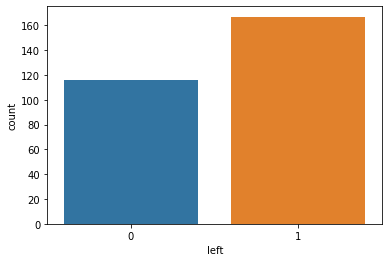

In [44]:
sns.countplot(x="left", data=cluster4)

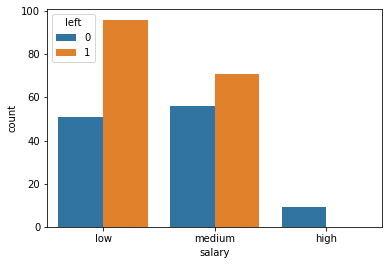

In [45]:
sns.countplot(x="salary", data=cluster4, hue = 'left')

In [46]:
# from these plots we gather no one with a high salary left in this cluster and with a evaluation score of 1

### Predictive modelling

In [49]:
hr_dataset_encoded

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  Work_accident  left  \
0                        157                   3              0     1   
1                        262                   6              0     1   
2                        272                   4              0     1   
3                        223                   5              0     1   
4                        159                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       promotion_last_5years  salary  department_IT  department_RandD  \
0                          0       1              0                 0   
1                          0       2              0                 0   
2                          0       2              0                 0   
3                          0       1              0                 0   
4                          0       1              0                 0   
...                      ...     ...            ...               ...   
14994                      0       1              0                 0   
14995                      0       1              0                 0   
14996                      0       1              0                 0   
14997                      0       1              0                 0   
14998                      0       1              0                 0   

       department_accounting  department_hr  department_management  \
0                          0              0                      0   
1                          0              0                      0   
2                          0              0                      0   
3                          0              0                      0   
4                          0              0                      0   
...                      ...            ...                    ...   
14994                      0              0                      0   
14995                      0              0                      0   
14996                      0              0                      0   
14997                      0              0                      0   
14998                      0              0                      0   

       department_marketing  department_product_mng  department_sales  \
0                         0                       0                 1   
1                         0                       0                 1   
2                         0                       0                 1   
3                         0                       0                 1   
4                         0                       0                 1   
...                     ...                     ...               ...   
14994                     0                       0                 0   
14995                     0                       0                 0   
14996     

In [50]:
X = hr_dataset_encoded.drop(['left'],axis = 1).values
y = hr_dataset_encoded['left'].values

In [51]:
# test train split our model, with a 80:20 split between the training and testing sets

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
X_train[0] # we can see some variables are above the 0 to 1 range that most of the others are

array([  0.75,   0.81,   5.  , 227.  ,   5.  ,   0.  ,   0.  ,   2.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   1.  ])

In [54]:
# lets scale the model now, only number_project, average_monthly_hours, time_spend_company and salary need to be scaled\
# as they are not in a 0 to 1 range

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[:,[2,3,4,7]] = sc.fit_transform(X_train[:,[2,3,4,7]])
X_test[:,[2,3,4,7]] = sc.fit_transform(X_test[:,[2,3,4,7]])

In [56]:
X_train[0]

array([0.75      , 0.81      , 0.96618991, 0.52049956, 1.03337906,
       0.        , 0.        , 1.04398693, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        ])

In [57]:
# we can begin testing

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred)
print(cm_dtc)
acc_dtc = accuracy_score(y_test, y_pred) * 100
acc_dtc

[[2265   34]
 [  25  676]]


98.03333333333333

In [59]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred)
print(cm_svc)
acc_svc = accuracy_score(y_test, y_pred)*100
acc_svc

[[2164  135]
 [ 527  174]]


77.93333333333334

In [60]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
               
y_pred = classifier.predict(X_test)
cm_ksvc = confusion_matrix(y_test, y_pred)
print(cm_svc)
acc_ksvc = accuracy_score(y_test, y_pred) *100
acc_ksvc

[[2164  135]
 [ 527  174]]


95.96666666666667

In [61]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
acc_lr = accuracy_score(y_test, y_pred)*100
acc_lr

[[2123  176]
 [ 528  173]]


76.53333333333333

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
acc_nb = accuracy_score(y_test, y_pred)*100
acc_nb

[[1683  616]
 [ 145  556]]


74.63333333333333

In [63]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred)
print(cm_rfc)
acc_rfc = accuracy_score(y_test, y_pred)*100
acc_rfc

[[2294    5]
 [  17  684]]


99.26666666666667

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)
cm_knc = confusion_matrix(y_test, y_pred)
print(cm_knc)
acc_knc = accuracy_score(y_test, y_pred)*100
acc_knc

[[2225   74]
 [  26  675]]


96.66666666666667

In [65]:
# lets create a dataframe to represent these

values = {'Model': ['Decision Tree','Linear SVC', 'RBF SVC', 'Logistic Regression', 'Naive Bayes', ' Random Forest', ' KNeighbors'],
        'Accuracy %': [acc_dtc,acc_svc,acc_ksvc,acc_lr,acc_nb,acc_rfc,acc_knc]}

model_accuracy_df = pd.DataFrame(values, columns = ['Model', 'Accuracy %'])
model_accuracy_df['Accuracy %'] = model_accuracy_df['Accuracy %'].round(2)
model_accuracy_df

Model  Accuracy %
0        Decision Tree       98.03
1           Linear SVC       77.93
2              RBF SVC       95.97
3  Logistic Regression       76.53
4          Naive Bayes       74.63
5        Random Forest       99.27
6           KNeighbors       96.67

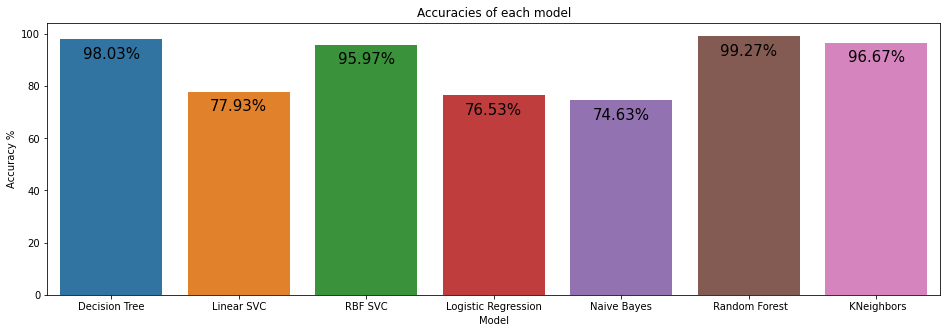

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(16,5)
model_bar = sns.barplot(x="Model", y="Accuracy %", data = model_accuracy_df)
plt.title("Accuracies of each model") 

for p in model_bar.patches:
    model_bar.annotate('{:.2f}%'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -15), 
                   textcoords = 'offset points')

    


In [67]:
# we see that random forest has the best accuracy

Text(0.5, 1.0, 'KNeighbours Model')

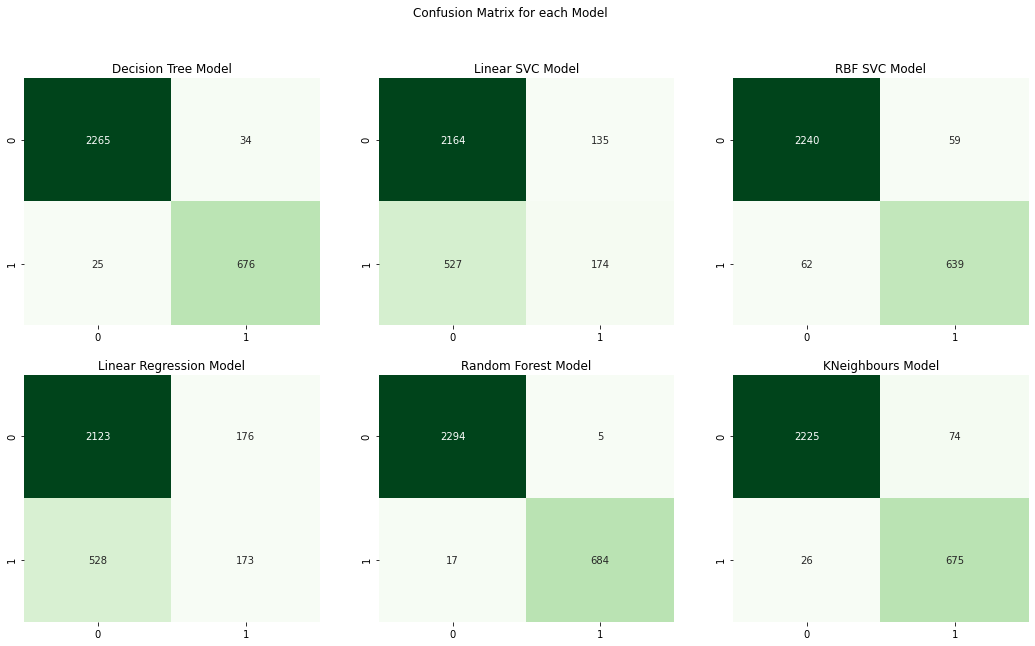

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Confusion Matrix for each Model')

sns.heatmap(cm_dtc, ax = axes[0,0],annot=True, cbar=False, cmap="Greens",  fmt="d").set_title('Decision Tree Model')
sns.heatmap(cm_svc, ax = axes[0,1], annot=True, cbar=False, cmap="Greens",  fmt="d").set_title('Linear SVC Model')
sns.heatmap(cm_ksvc, ax = axes[0,2],annot=True, cbar=False , cmap="Greens",  fmt="d").set_title('RBF SVC Model')
sns.heatmap(cm_lr, ax = axes[1,0], annot=True, cbar=False, cmap="Greens",  fmt="d").set_title('Linear Regression Model')
sns.heatmap(cm_rfc, ax = axes[1,1], annot=True, cbar=False, cmap="Greens", fmt="d").set_title('Random Forest Model')
sns.heatmap(cm_knc, ax = axes[1,2], annot=True, cbar=False, cmap="Greens", fmt="d").set_title('KNeighbours Model')

In [71]:
# we find random forest to be the best model, with an accuracy of 99.27% after tuning the hyperparameters

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

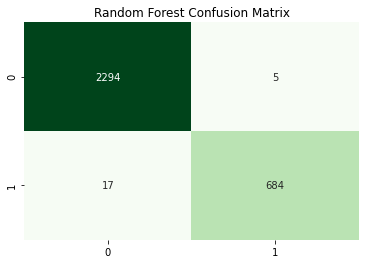

In [70]:
sns.heatmap(cm_rfc, annot=True, cbar=False, cmap="Greens", fmt="d").set_title('Random Forest Confusion Matrix')


In [ ]:
hr_dataset_analysis.to_csv('hr_analysis.csv')